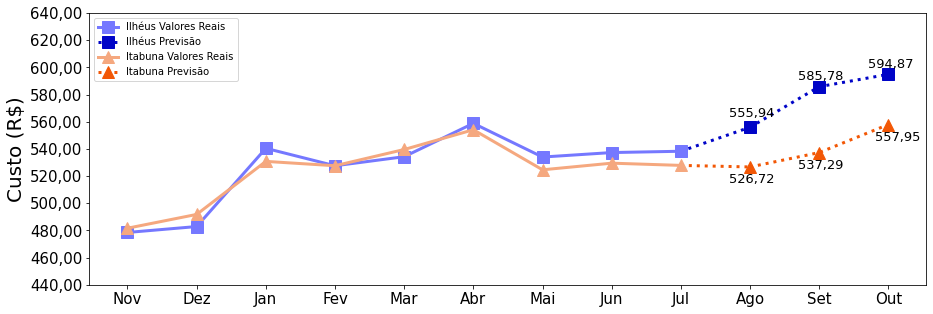

In [5]:
import configparser
import json
import matplotlib.pyplot as plt

#Capturando as configurações dos gráficos
configs = configparser.ConfigParser()
configs.read('../configuracoes_graficos.conf')
values = []
for key,value in configs.items("CESTA_BASICA"):
    values.append(value)
qtd_meses = int(values[0])
meses_previstos = values[1].split(',')
meses_previstos = [mes.strip() for mes in meses_previstos]
meses_anteriores = values[2].split(',')
meses_anteriores = [mes.strip() for mes in meses_anteriores]

valores_reais_ilheus = values[3]
valores_reais_ilheus = valores_reais_ilheus.replace('[','')
valores_reais_ilheus = valores_reais_ilheus.replace(']','')
valores_reais_ilheus = valores_reais_ilheus.split(',')
valores_reais_ilheus = [float(valor) for valor in valores_reais_ilheus]

valores_reais_itabuna = values[4]
valores_reais_itabuna = valores_reais_itabuna.replace('[','')
valores_reais_itabuna = valores_reais_itabuna.replace(']','')
valores_reais_itabuna = valores_reais_itabuna.split(',')
valores_reais_itabuna = [float(valor) for valor in valores_reais_itabuna]

eixo_y_limite_sup = int(values[5]) + 1
eixo_y_limite_inf = int(values[6])
eixo_y_varia_em = int(values[7])

ano_previsao = int(values[8])

modelo = int(value[9])

assert len(meses_previstos) == qtd_meses, "A quantidade de meses previstos passados deve ser igual ao número atribuiído em qtd_meses_previstos"
assert len(meses_anteriores) == 12-qtd_meses, "A quantidade de meses anteriores passados deve ser igual a 12 - meses previstos."
assert len(valores_reais_ilheus) == len(meses_anteriores), "A quantidade de valores dos meses anteriores deve ser igual ao dos nomes dos meses"
#------------------------------------------------
#Capturando os resultados das previsões
resultados = {'ilheus':[], 'itabuna':[]}
cidades = [r'ilheus', r'itabuna'] 
 
for cidade in cidades:
    with open(f'previsoes_cesta/previsao_{modelo}_cesta_basica_{cidade}.json','r') as file:
        resultado = json.load(file)
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("[", "")
        resultado['cesta_basica'] = resultado['cesta_basica'].replace("]", "")
        temp = resultado['cesta_basica'].split(',')
        for valor in temp:
            resultados[cidade].append(float(valor) * 1000)
#----------------
#Plotando o gráfico

line_size = 3
marker_size = 12
mark= "s"
xlabel = meses_anteriores + meses_previstos
plt.figure(figsize=(15, 5))

#Ilhéus---------------------
yhatIlheus = resultados['ilheus']
real_valuesIlheus = valores_reais_ilheus

plt.plot([8,9],[real_valuesIlheus[-1],yhatIlheus[0]],":",color="#0004c7",lw=line_size, markersize=marker_size)
plt.plot([x for x in range(9)],real_valuesIlheus, marker=mark,label="Ilhéus Valores Reais", color='#7578ff',lw=line_size, markersize=marker_size)
plt.plot([9,10,11],yhatIlheus,":" ,marker=mark, label="Ilhéus Previsão",color='#0004c7',lw=line_size, markersize=marker_size)
#plt.xticks([x for x in range(0,12)],xlabel,size=15)
#plt.ylabel("Preço R$",size=20)
#plt.yticks([y for y in range(300,561,20)],[format(y,".2f").replace(".",",") for y in range(300,561,20)],size=15)

legendas = real_valuesIlheus + [round(y,2) for y in yhatIlheus]
margem = 4
sis = 13
cr = -0.8
for k in range(9,12):
    margem = 21
    cr=-0.1
    if k == 11:
        margem = -5
        cr=-0.3
    if k==10:
        margem = -5
        cr = -0.3
    if k==9:
        margem = -8
        cr = -0.3
 #   plt.annotate(str(legendas[k]).replace(".",","),(k+cr,legendas[k]-margem),size=sis)
    plt.annotate(format(legendas[k],".2f").replace(".",","),(k+cr,legendas[k]-margem),size=sis)
       
#Itabuna------------------

real_values_itb = valores_reais_itabuna
yhat_itb = resultados['itabuna']
mark = "^"
plt.plot([8,9],[real_values_itb[-1],yhat_itb[0]],":",color="#f25705",lw=line_size, markersize=marker_size)
plt.plot([x for x in range(9)],real_values_itb, marker=mark,label="Itabuna Valores Reais", color='#f5a87f',lw=line_size, markersize=marker_size)
plt.plot([9,10,11],yhat_itb,":" ,marker=mark, label="Itabuna Previsão",color='#f25705',lw=line_size, markersize=marker_size)
legendas_itb = real_values_itb + [round(y,2) for y in yhat_itb]
margem = 10
sis = 10
contr = 0
for i in range(9,12):
    margem = -13
    sis = 13
    contr = -0.5
    if i==9:
        margem = 12
        contr = -0.3
    if i==10:
        contr = -0.3
        margem = 12
    if i == 11:
        margem = 12
        sis = 13
        contr = -0.2
    #plt.annotate(str(legendas_itb[i]).replace(".",","),(i+contr,legendas_itb[i]-margem),size=sis)
    plt.annotate(format(legendas_itb[i],".2f").replace(".",","),(i+contr,legendas_itb[i]-margem),size=sis)

plt.xticks([x for x in range(0,12)],xlabel,size=15)
plt.ylabel("Custo (R$)",size=20)
plt.yticks([y for y in range(eixo_y_limite_inf,eixo_y_limite_sup,eixo_y_varia_em)],[format(y,".2f").replace(".",",") for y in range(eixo_y_limite_inf,eixo_y_limite_sup,eixo_y_varia_em)],size=15)
plt.legend(loc=2)   

chart_name = f'figuras/previsa_cestaBas_de_{meses_previstos[0]}_ate_{meses_previstos[2]}_{ano_previsao}.png'
plt.savefig(fname=chart_name)